# Toyota Corolla
Autor: Dr. Pedro Bernabé Araujo
email: pedrobernabearaujo@gmail.com

Notebook para la clase de Inteligencia Empresarial y Datamining

In [179]:
#Data manipulation
import pandas as pd
import numpy as np

#Data visualiaztion
import matplotlib.pyplot as plt 
import seaborn as sns

#Feature Selection
from sklearn.model_selection import train_test_split

#Model
import statsmodels.api as sm

#Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#Model Tracking
import mlflow
mlflow.statsmodels.autolog(disable=True)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

In [180]:
%matplotlib inline

In [181]:
experiment_name = 'Toyota_Corolla'
mlflow.set_tracking_uri('http://127.0.0.1:5000')
#mlflow.autolog()

In [182]:
if not mlflow.get_experiment_by_name(experiment_name):
    print(f'El experimento no existe!!!')
    experiment = mlflow.create_experiment(name=experiment_name)

experiment = mlflow.set_experiment(experiment_name=experiment_name)

In [183]:
file_name = "ToyotaCorolla.csv"

def load_dataset(file_name:str)->pd.DataFrame:
    df_aux = pd.read_csv("data/"+file_name, engine='python')
    print(f"The dataset was successfully opened!")
    return df_aux

In [184]:
df_raw = load_dataset(file_name)
df_raw.head(10)

The dataset was successfully opened!


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
6,7,?TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,1,0,0,1,1,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
8,9,?TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
9,10,?TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,0,1,0,0,0,1,0,0,0


# Análisis Exploratorio de Datos

In [185]:
#Dimensión del dataset en crudo
df_raw.shape

(1436, 37)

In [186]:
#Info del dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [187]:
#Descripción de los datos del dataset
df_raw.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [188]:
#Descripción de los datos del dataset (transpuesto)
df_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1436.0,NaN,NaN,NaN,721.555014,416.47689,1.0,361.75,721.5,1081.25,1442.0
Model,1436,372,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,1436.0,NaN,NaN,NaN,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.0,32500.0
Age_08_04,1436.0,NaN,NaN,NaN,55.947075,18.599988,1.0,44.0,61.0,70.0,80.0
Mfg_Month,1436.0,NaN,NaN,NaN,5.548747,3.354085,1.0,3.0,5.0,8.0,12.0
Mfg_Year,1436.0,NaN,NaN,NaN,1999.625348,1.540722,1998.0,1998.0,1999.0,2001.0,2004.0
KM,1436.0,NaN,NaN,NaN,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
Fuel_Type,1436,3,Petrol,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,1436.0,NaN,NaN,NaN,101.502089,14.98108,69.0,90.0,110.0,110.0,192.0
Met_Color,1436.0,NaN,NaN,NaN,0.674791,0.468616,0.0,0.0,1.0,1.0,1.0


Las primeras observaciones podemos concluir que existen en el dataset que no son necesarias para nuestro análisis. Las mismas son:

"Id"
"Model". Se supone que esta variable ya fue trabajada y de ella se pudo obtener algún tipo de información.
"Cylinders" por ser constante.

In [189]:
columns_to_delete = ['Id','Model','Cylinders']
df_raw.drop(columns=columns_to_delete, axis=1, inplace=True)

### Búsqueda de valores nulos y duplicados

In [190]:
df_raw.isnull().sum()

Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [191]:
df_raw[df_raw.duplicated()]

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
113,24950,8,1,2004,13253,Diesel,116,1,0,2000,...,1,1,1,0,0,0,0,0,0,0


Solo dos observaciones están duplicadas, esto al ser un porcentaje ridiculamente bajo no tiene impacto alguno en el análisis. 

### Visualización de datos

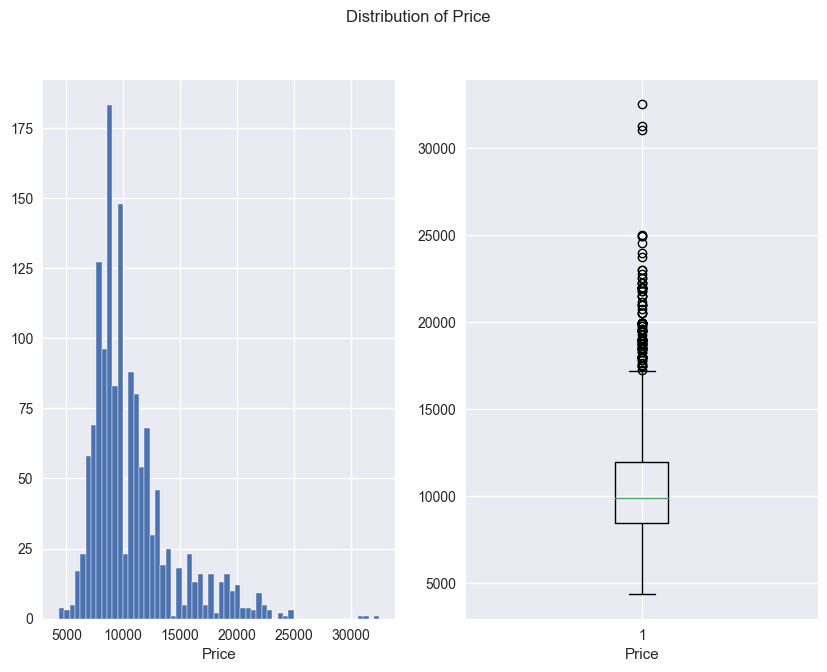

In [192]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
fig.suptitle("Distribution of Price")
ax1.hist(df_raw.Price, bins=60)
ax1.set_xlabel(df_raw.Price.name)

ax2.boxplot(df_raw.Price)
ax2.set_xlabel(df_raw.Price.name)

plt.show()

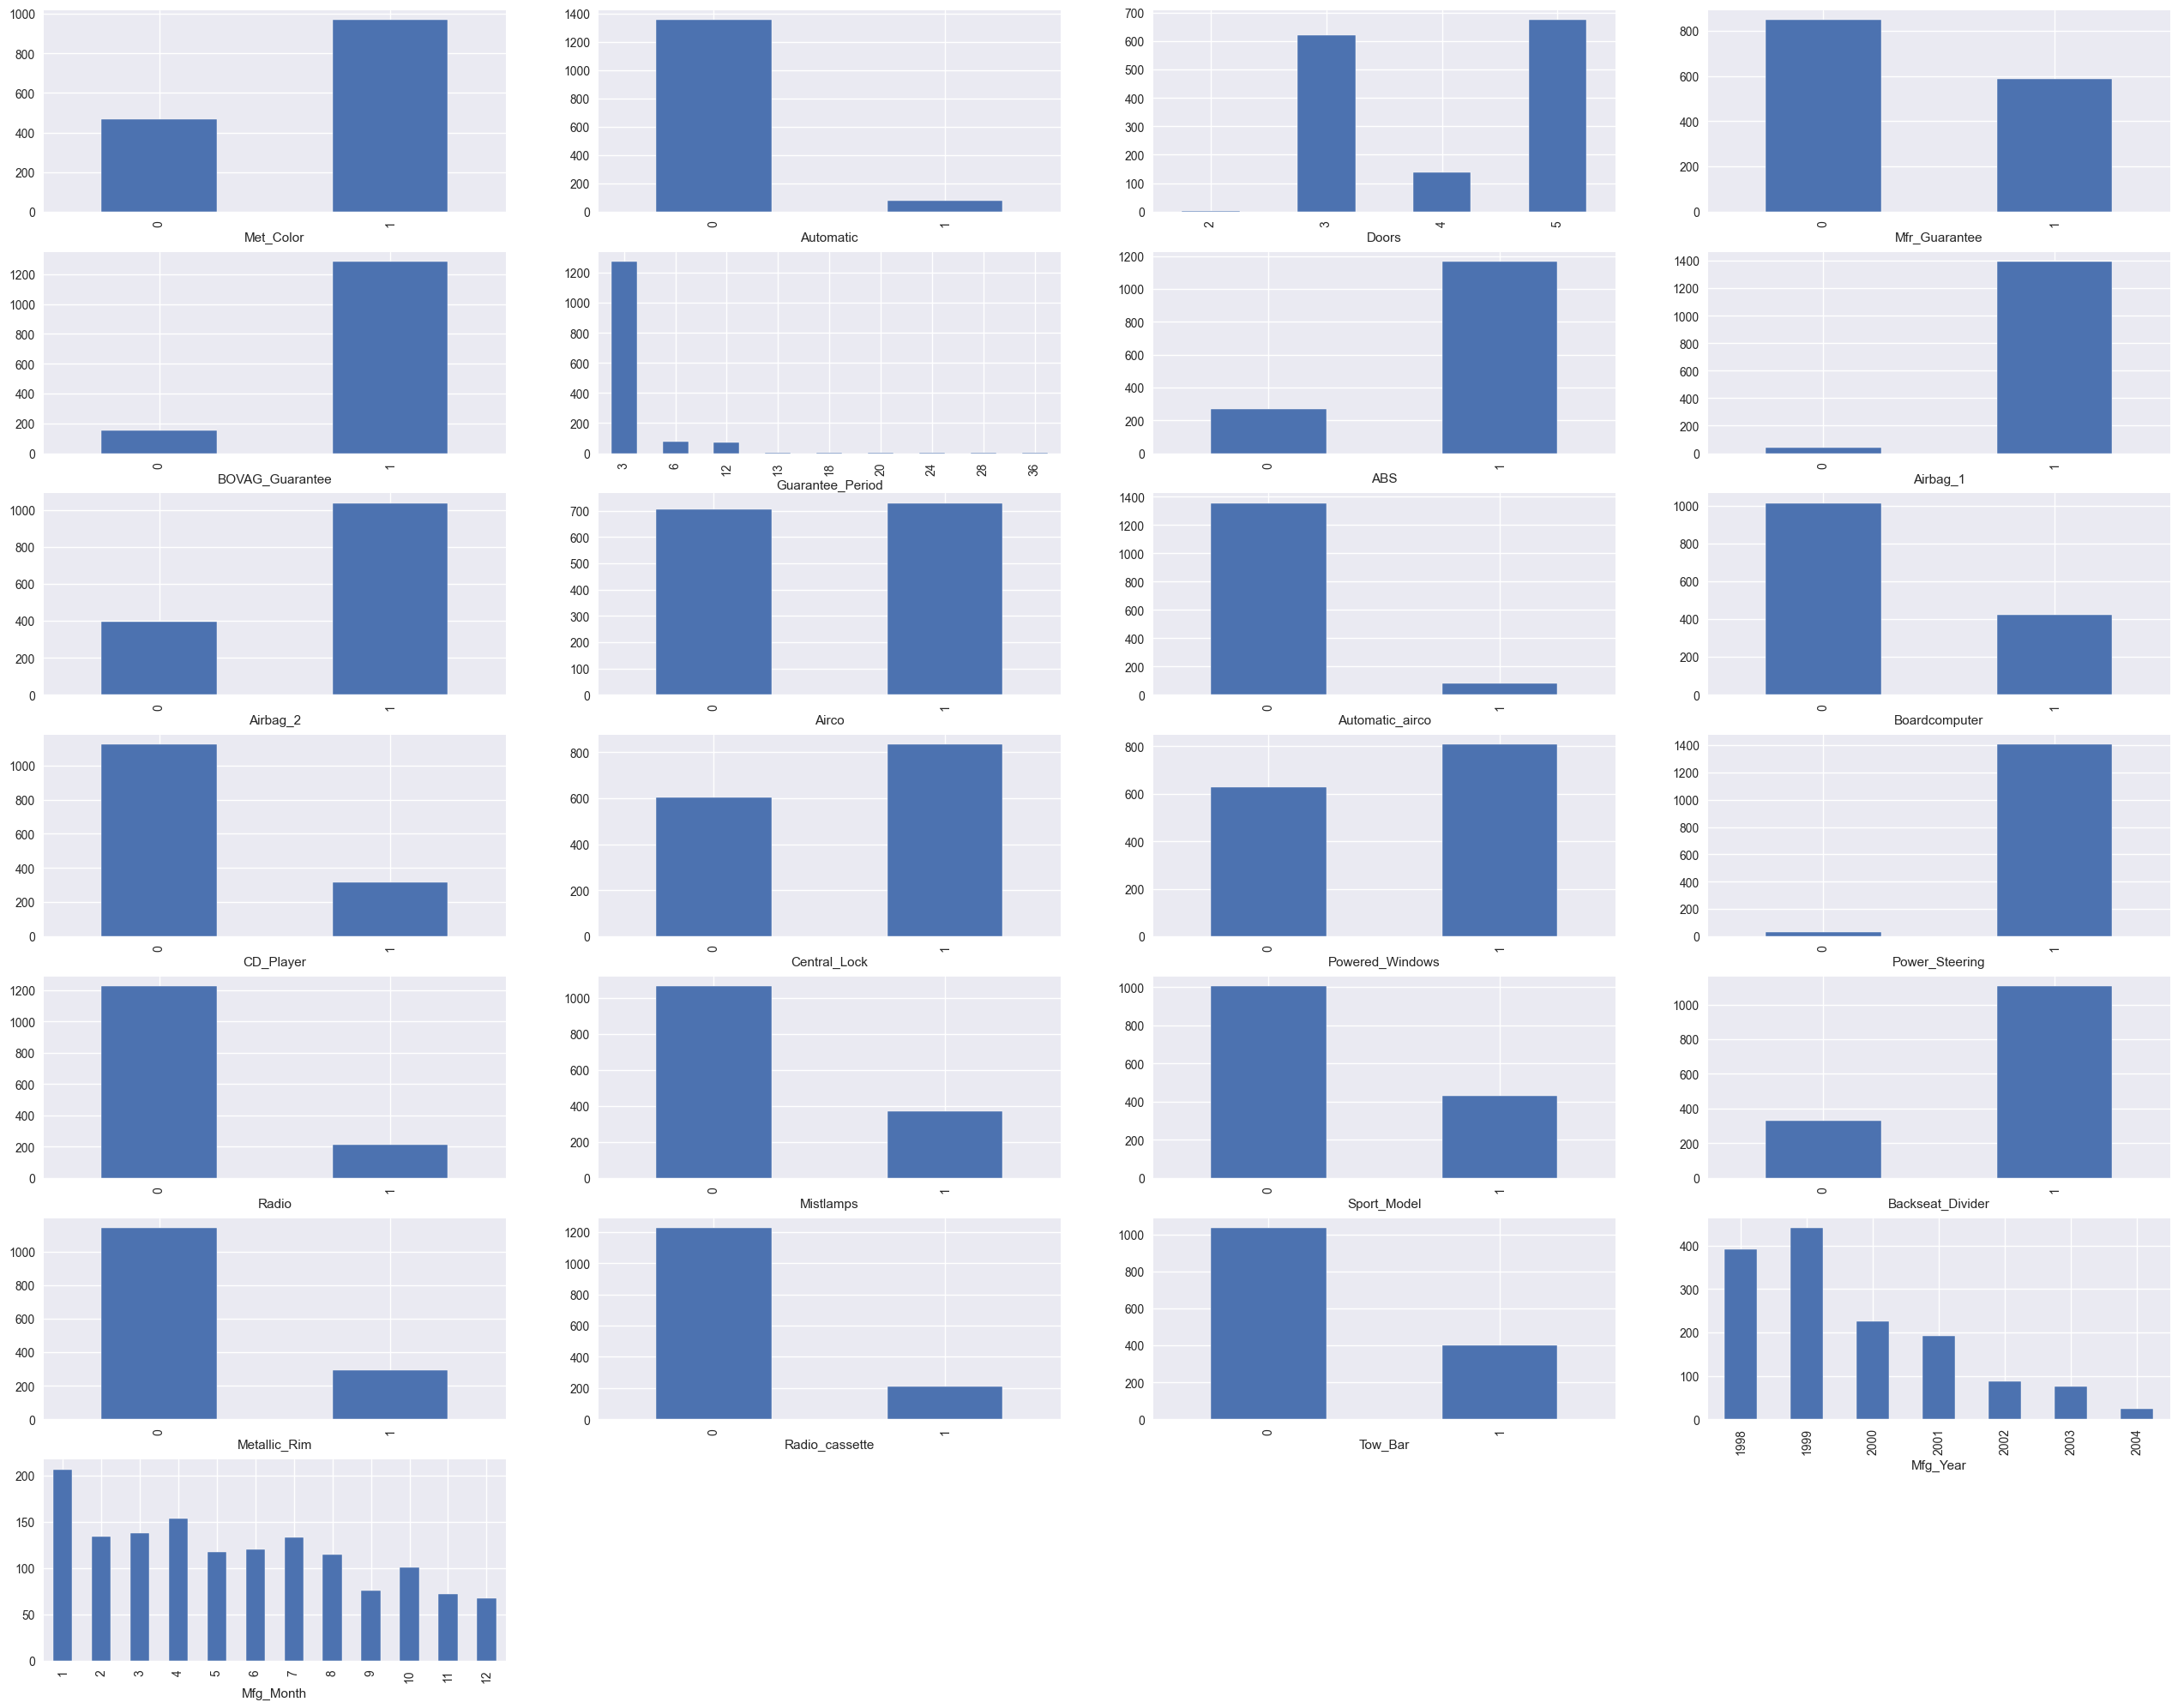

In [193]:
variables_categoricas = ['Met_Color','Automatic','Doors','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar', 'Mfg_Year', 'Mfg_Month']

fig = plt.figure(figsize=(32,25))

for i in range(len(variables_categoricas)):
    continuos = variables_categoricas[i]

    ax1 = fig.add_subplot(7,4,i+1)
    ax1.set_xlabel(continuos)

    df_raw.groupby(continuos).size().plot(kind='bar')

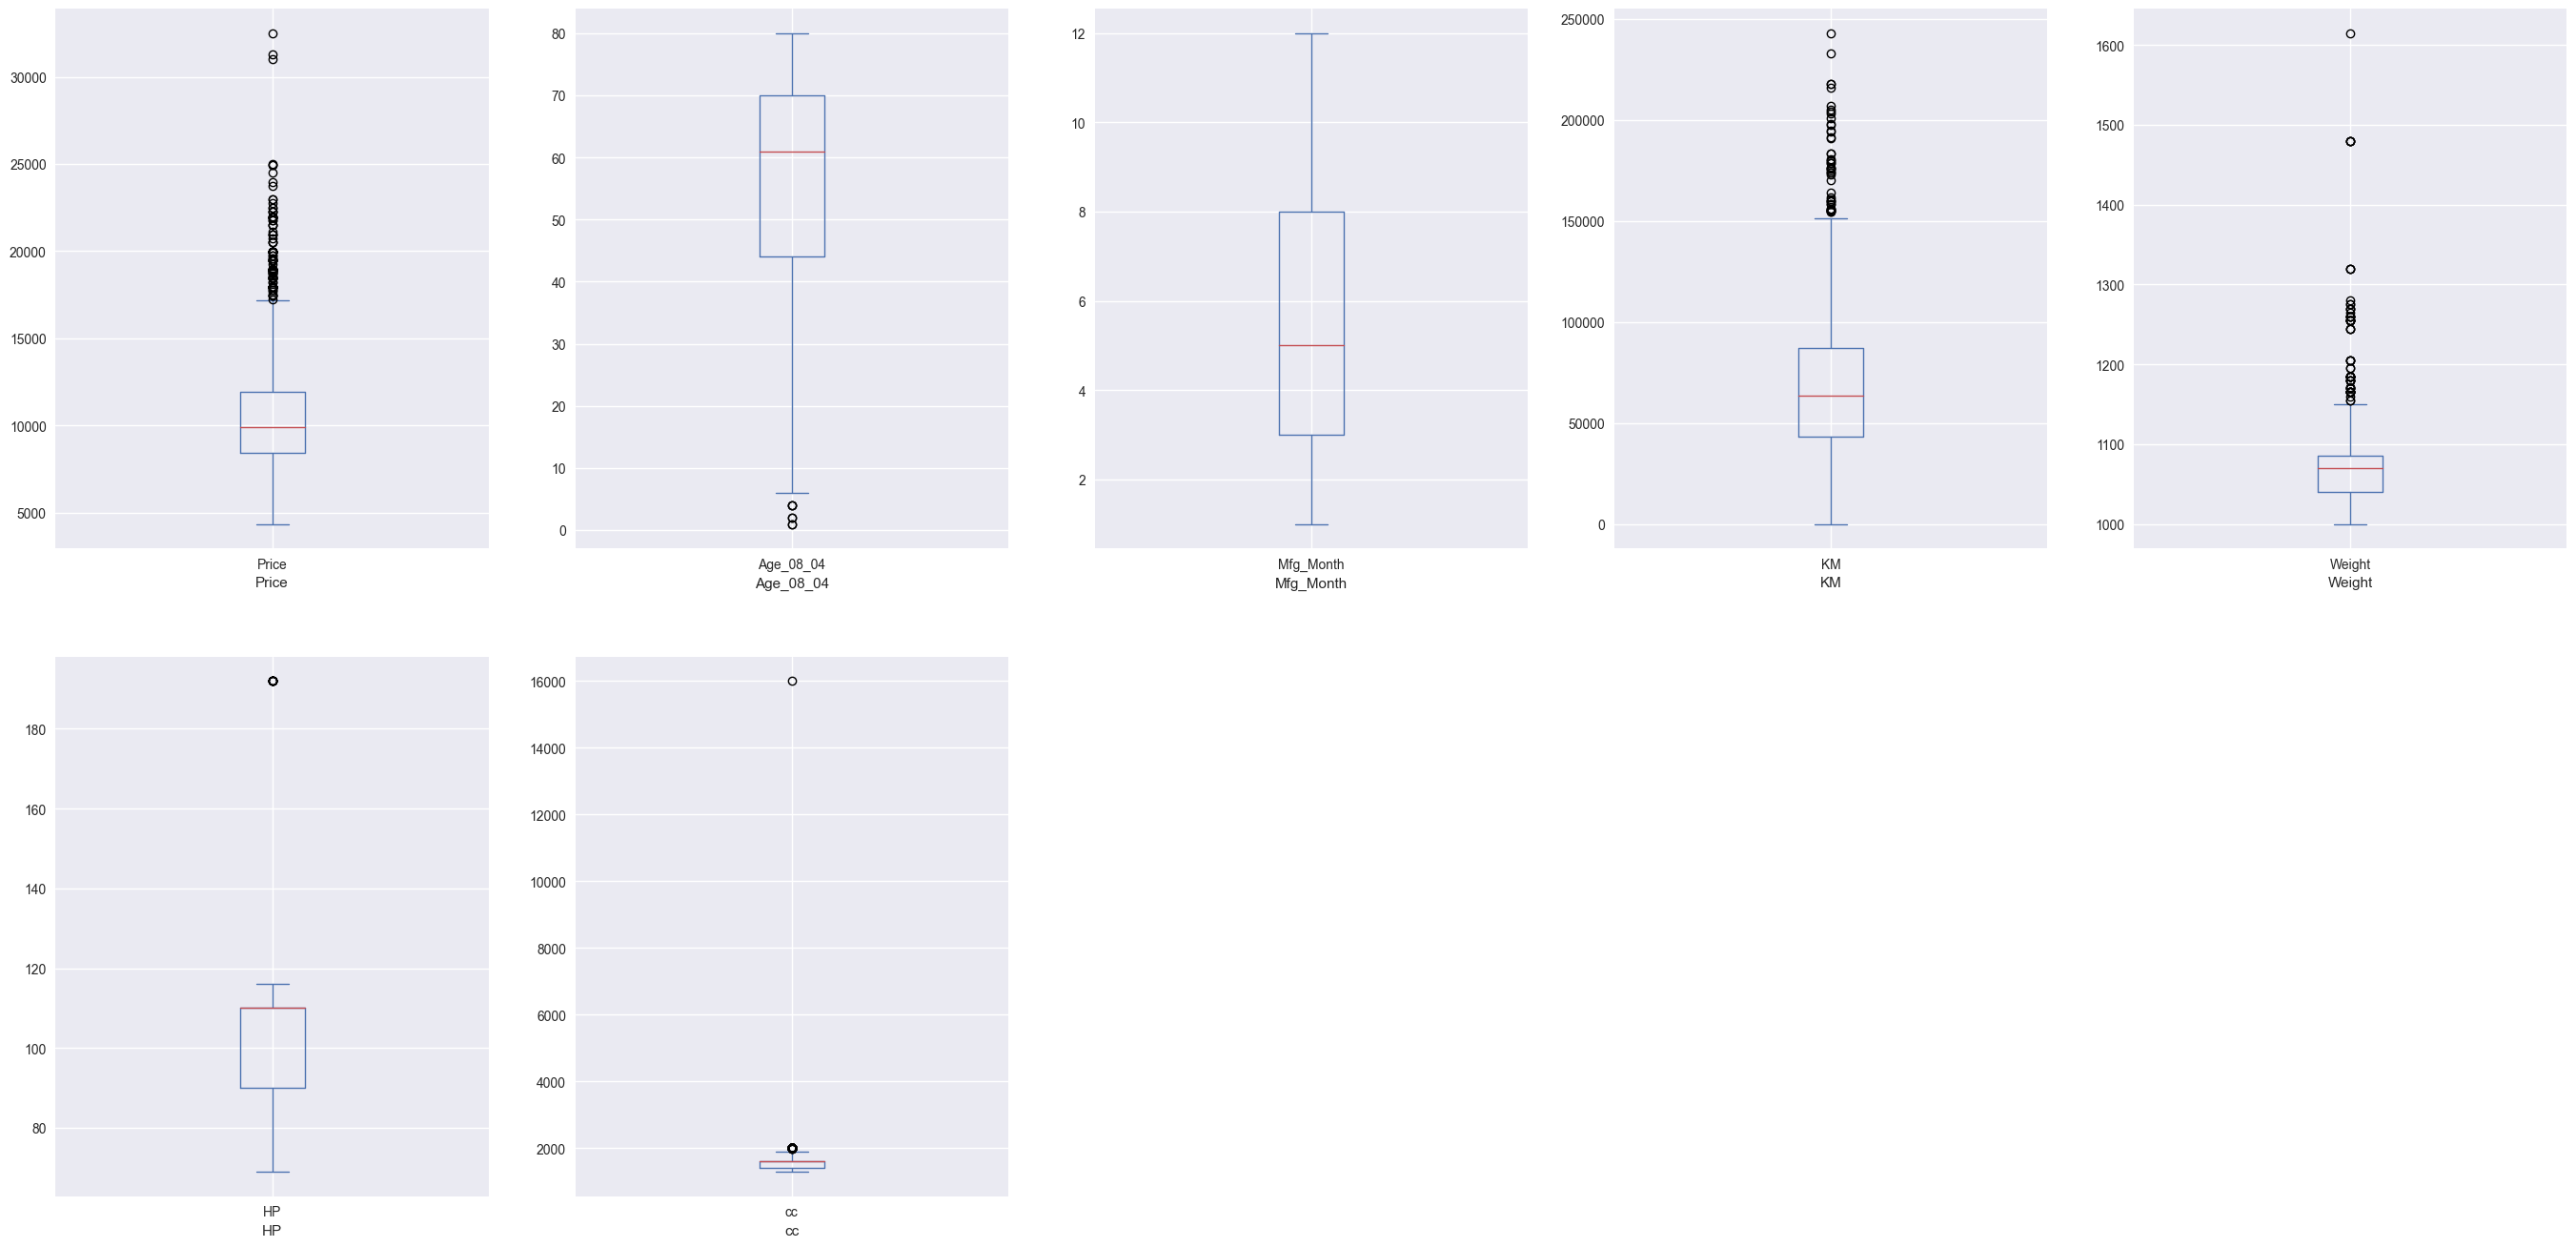

In [194]:
variables_continuas = ["Price", "Age_08_04", "Mfg_Month", "KM", "Weight", "HP","cc"]
fig = plt.figure(figsize=(34,25))

for i in range(len(variables_continuas)):
    continuos = variables_continuas[i]

    ax1 = fig.add_subplot(3,5,i+1)
    ax1.set_xlabel(continuos)

    df_raw[continuos].plot(kind='box')

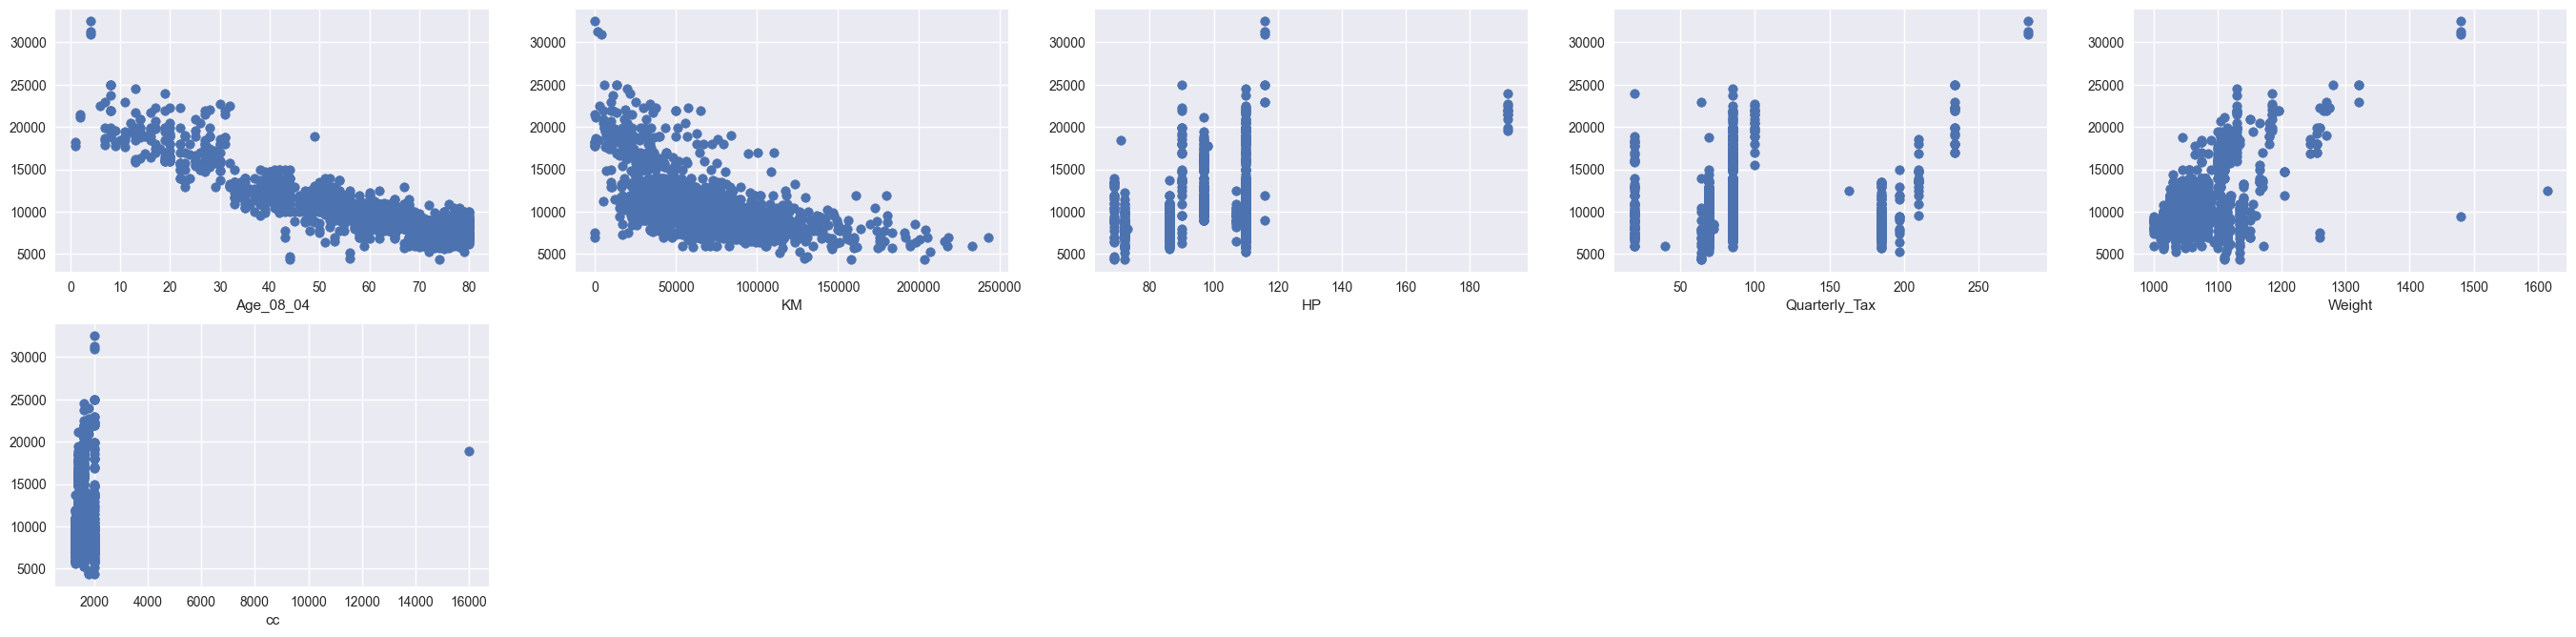

In [195]:
variables_continuas_scatter = ['Age_08_04','KM','HP','Quarterly_Tax','Weight','cc']
fig = plt.figure(figsize=(34,25))

for i in range(len(variables_continuas_scatter)):
    aux = variables_continuas_scatter[i]

    ax1 = fig.add_subplot(6,5,i+1)
    ax1.set_xlabel(aux)

    plt.scatter(df_raw[aux],df_raw.Price)

In [196]:
df = pd.get_dummies(data=df_raw, columns=['Fuel_Type'], drop_first=True, prefix="FT_", dtype=int) #convierto la variable categorica Fuel_type en variables booleanas

In [197]:
columnas_eliminar = ['Met_Color', 'Automatic', 'cc', 'Doors', 'Gears', 'Mfr_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar', 'Mfg_Month']
df.drop(columns=columnas_eliminar, axis=1, inplace=True)

In [198]:
#correlaciones = df.corr(method='pearson')
#correlaciones.sort_values(by="Price")
#correlaciones.style.background_gradient(cmap='coolwarm')

<Axes: title={'center': 'Mapa de Correlaciones'}>

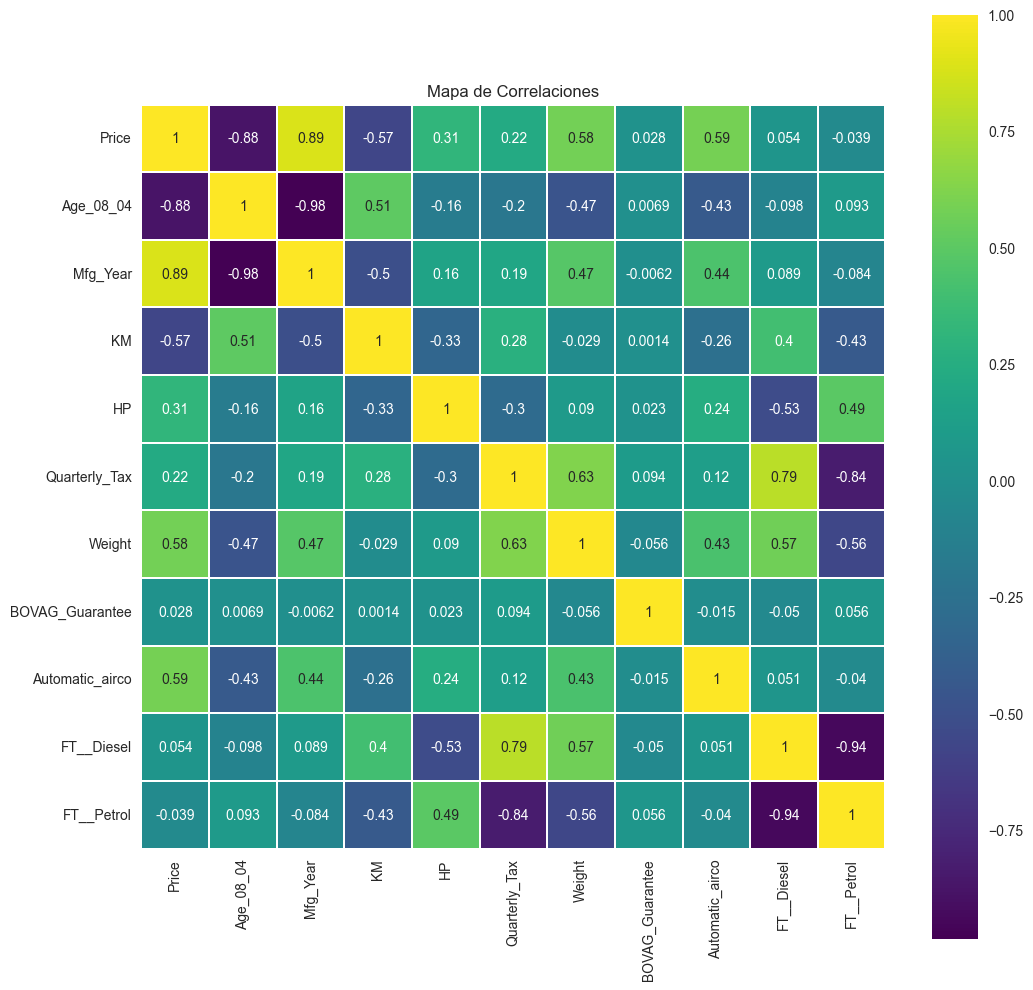

In [199]:
plt.figure(figsize=(12,12))
plt.title("Mapa de Correlaciones")
corr = df.corr(method="pearson")
sns.heatmap(corr, annot=True, cmap=plt.cm.viridis, linewidths=0.1, linecolor="white", square=True)

In [200]:
split_param = {
    'test_size' :0.4,
    'random_state': 42,
    'shuffle': True
}

x_train, x_test, y_train, y_test = train_test_split(df.drop(['Price'], axis=1), df.Price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((861, 10), (575, 10), (861,), (575,))

In [201]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     803.5
Date:                Tue, 19 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:56:27   Log-Likelihood:                -7278.8
No. Observations:                 861   AIC:                         1.458e+04
Df Residuals:                     850   BIC:                         1.463e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -2.51e+06   2.81e+05     

In [202]:
y_pred = model.predict(sm.add_constant(x_test))

In [203]:
print(f"r2: {model.rsquared}")

r2: 0.904336226095458


In [204]:
def eval_metrics(y_test, y_pred)-> dict:
    return {
        "rmse" : mean_squared_error(y_test, y_pred, squared=False),
        "mae" : mean_absolute_error(y_test, y_pred),
        "mape" : mean_absolute_percentage_error(y_test, y_pred)    
    }       
    

In [205]:
lr_metrics = eval_metrics(y_test, y_pred)
print(f'Root Mean Squared Error (RMSE):{lr_metrics.get("rmse")}')
print(f'Mean Absolute Error (MAE):{lr_metrics.get("mae")}')
print(f'Mean Absolute Porcentage Error (MAPE):{lr_metrics.get("mape")}')


Root Mean Squared Error (RMSE):1225.4687938275897
Mean Absolute Error (MAE):890.9054164248492
Mean Absolute Porcentage Error (MAPE):0.08869498237669865


In [206]:
with mlflow.start_run(experiment_id=experiment.experiment_id):
    
    mlflow.log_param('r2', model.rsquared)
    
    #parametes
    mlflow.log_params(split_param)
    
    #metrics 
    mlflow.log_metrics(lr_metrics)        
    
#mlflow.end_run()

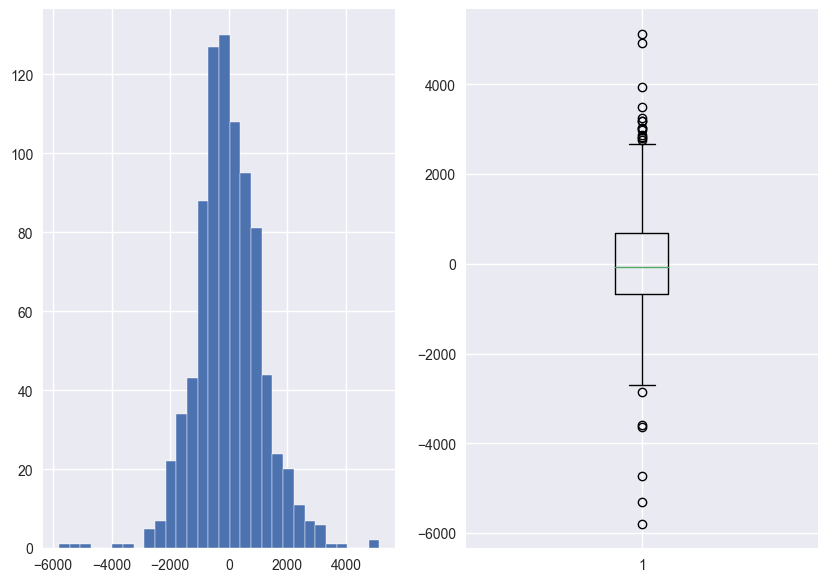

In [207]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,7))
ax1.hist(model.resid, bins=30)
ax2.boxplot(model.resid)
plt.show()

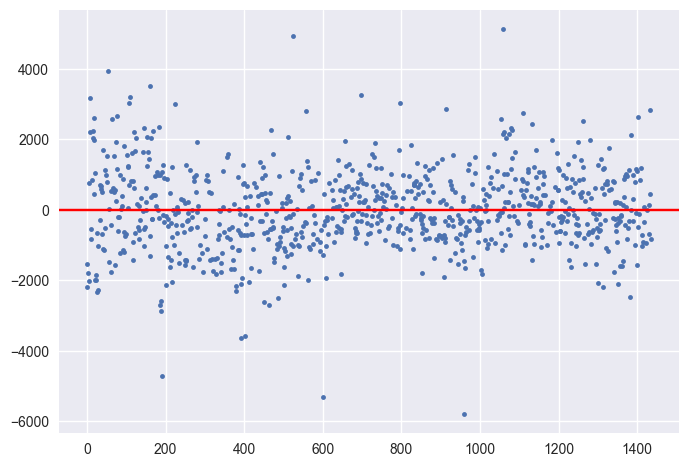

In [208]:
fitted_values = model.fittedvalues
residuals = y_train - fitted_values

fig, ax = plt.subplots()
ax.plot(residuals, marker='.', alpha = 1, linestyle='None')
ax.axhline(y=0, color = 'r')
plt.show()

Text(0, 0.5, 'Residuals')

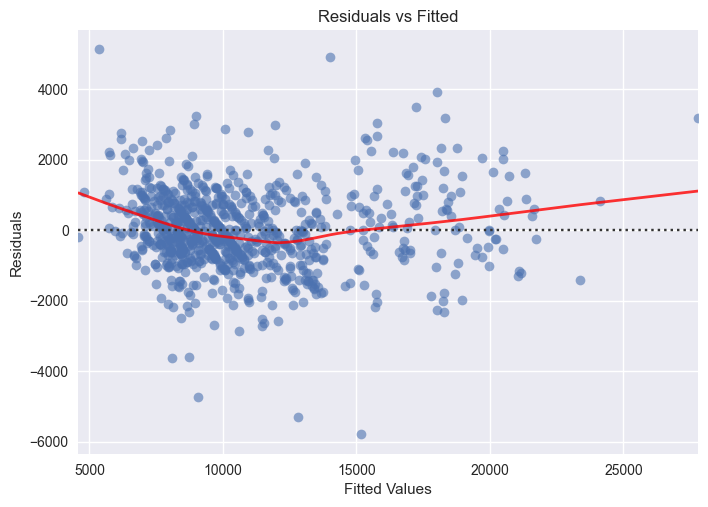

In [209]:
# También conocido como "Residual Plot"
plot = sns.residplot(y=residuals, x=fitted_values, lowess=True,
                     scatter_kws={'alpha':0.6},
                     line_kws={'color': 'red', 'lw':2, 'alpha':0.8})
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted Values')
plot.set_ylabel('Residuals')

# Otra form de hacer el plot
#fig, ax = plt.subplots()
#sns.scatterplot(x=fitted_values, y=residuals)
#ax.axhline(y=0, color='grey', linestyle='dashed')
#ax.set_xlabel('Fitted values')
#ax.set_ylabel('Sqrt(standardized residuals)')
#ax.set_title('Scale-Location Plot')

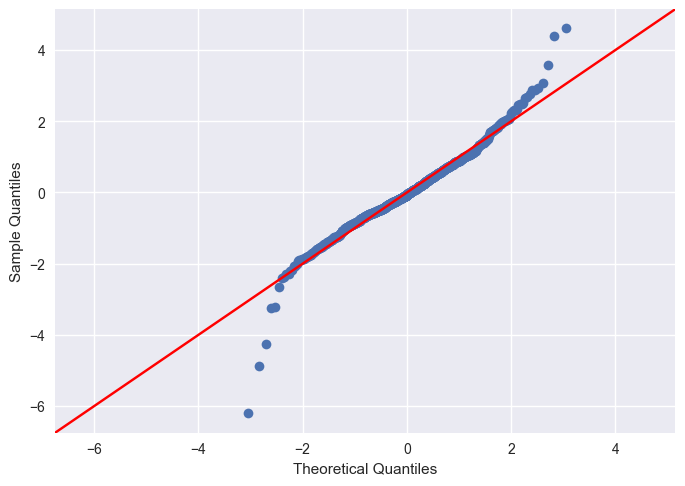

In [210]:
residuals_norm = model.get_influence().resid_studentized_internal
plot = sm.qqplot(residuals_norm, line='45')

Text(0.5, 1.0, 'Residuals vs Leverage Plot')

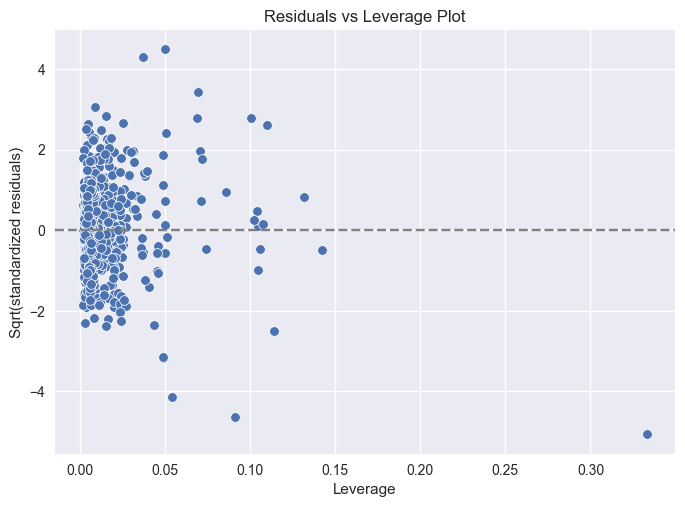

In [211]:
stand_resids = model.resid_pearson

influence = model.get_influence()
leverage = influence.hat_matrix_diag

fig, ax = plt.subplots()
sns.scatterplot(x=leverage, y=stand_resids)
ax.axhline(y=0, color='grey', linestyle='dashed')
ax.set_xlabel('Leverage')
ax.set_ylabel('Sqrt(standardized residuals)')
ax.set_title('Residuals vs Leverage Plot')